In [2]:
import os
import cv2
import json
import random
import numpy as np
from datetime import datetime, timedelta
from osgeo import gdal
from matplotlib import pyplot as plt

In [3]:
DATA_ROOT_DIR = "/Volumes/X/Data/fusion-s1-s2/"
S2_ROOT_PATH = f"{DATA_ROOT_DIR}s2/sre-10m/"
ORBIT = "044"
S1_ROOT_PATH = f"{DATA_ROOT_DIR}s1db/32VNH/threeband/{ORBIT}/"

In [4]:
def closest_date(target_date, date_array):
    target = datetime.strptime(target_date, '%Y%m%d')
    date_array = [datetime.strptime(date, '%Y%m%d') for date in date_array]
    closest_date = min(date_array, key=lambda x: abs(target - x))
    return closest_date.strftime('%Y%m%d')

In [5]:
def date_difference(date1, date2):
    d1 = datetime.strptime(date1, '%Y%m%d')
    d2 = datetime.strptime(date2, '%Y%m%d')
    difference = abs(d1 - d2)

    # Convert the difference to 'YYYYMMDD' format
    years = difference.days // 365
    months = (difference.days % 365) // 30
    days = (difference.days % 365) % 30

    return f'{years:04d}{months:02d}{days:02d}'

In [6]:
with open("data/candidates.json", "r") as f:
    candidates = json.load(f)

In [7]:
def closest_date(target_date, date_array):
    target = datetime.strptime(target_date, '%Y%m%d')
    date_array = [d for d in date_array if d != "Store"]
    date_array = [datetime.strptime(date, '%Y%m%d') for date in date_array]
    closest_date = min(date_array, key=lambda x: abs(target - x))
    return closest_date.strftime('%Y%m%d')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


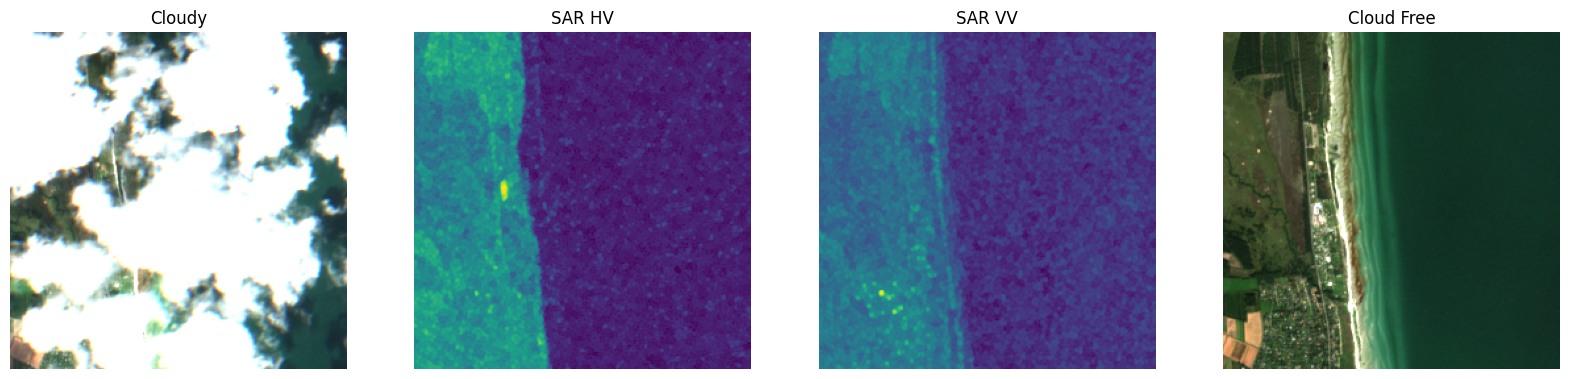

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(20, 20))

cloudy = "S2_32VNH_20190905_30_576780_6297440_256"
# cloudy = "S2_32VNH_20190405_1191_576780_6228320_256"
# cloudy = "S2_32VNH_20190405_873_533260_6246240_256"
# cloudy = "S2_32VNH_20190405_1211_517900_6225760_256"
# cloudy = "S2_32VNH_20190702_443_533260_6271840_256"
date_cloudy = "_".join(cloudy.split("_")[:3])
rest = "_".join(cloudy.split("_")[3:])

cloudy_B02 = gdal.Open(
    f"data/cropped/s2/{date_cloudy}/{date_cloudy}_B02/{date_cloudy}_B02_{rest}.vrt"
).ReadAsArray()

cloudy_B03 = gdal.Open(
    f"data/cropped/s2/{date_cloudy}/{date_cloudy}_B03/{date_cloudy}_B03_{rest}.vrt"
).ReadAsArray()

cloudy_B04 = gdal.Open(
    f"data/cropped/s2/{date_cloudy}/{date_cloudy}_B04/{date_cloudy}_B04_{rest}.vrt"
).ReadAsArray()

cloudy_data = np.stack((cloudy_B04, cloudy_B03, cloudy_B02), axis=-1)/2000
a = {'s2_cloudy_B02': 'data/cropped/s2/S2_32VNH_20190905/S2_32VNH_20190905_B02/S2_32VNH_20190905_B02_30_576780_6297440_256.vrt',
 's2_cloudy_B03': 'data/cropped/s2/S2_32VNH_20190905/S2_32VNH_20190905_B03/S2_32VNH_20190905_B03_30_576780_6297440_256.vrt',
 's2_cloudy_B04': 'data/cropped/s2/S2_32VNH_20190905/S2_32VNH_20190905_B04/S2_32VNH_20190905_B04_30_576780_6297440_256.vrt',
 's2_cloud_free_B02': 'data/cropped/s2/S2_32VNH_20190831/S2_32VNH_20190831_B02/S2_32VNH_20190831_B02_30_576780_6297440_256.vrt',
 's2_cloud_free_B03': 'data/cropped/s2/S2_32VNH_20190831/S2_32VNH_20190831_B03/S2_32VNH_20190831_B03_30_576780_6297440_256.vrt',
 's2_cloud_free_B04': 'data/cropped/s2/S2_32VNH_20190831/S2_32VNH_20190831_B04/S2_32VNH_20190831_B04_30_576780_6297440_256.vrt',
 's1_hv': 'data/cropped/s1/S1_32VNH_20190906/S1_32VNH_20190906_HV/S1_32VNH_20190906_HV_30_576780_6297440_256.vrt',
 's1_vv': 'data/cropped/s1/S1_32VNH_20190906/S1_32VNH_20190906_VV/S1_32VNH_20190906_VV_30_576780_6297440_256.vrt'}

cloud_free = "S2_32VNH_20190831_30_576780_6297440_256"
# cloud_free = "S2_32VNH_20190329_1191_576780_6228320_256"
# cloud_free = "S2_32VNH_20190413_873_533260_6246240_256"
# cloud_free = "S2_32VNH_20190413_1211_517900_6225760_256"
# cloud_free = "S2_32VNH_20190629_443_533260_6271840_256"
date_cloud_free = "_".join(cloud_free.split("_")[:3])
rest = "_".join(cloud_free.split("_")[3:])

cloud_free_B02 = gdal.Open(
    f"data/cropped/s2/{date_cloud_free}/{date_cloud_free}_B02/{date_cloud_free}_B02_{rest}.vrt"
).ReadAsArray()

cloud_free_B03 = gdal.Open(
    f"data/cropped/s2/{date_cloud_free}/{date_cloud_free}_B03/{date_cloud_free}_B03_{rest}.vrt"
).ReadAsArray()

cloud_free_B04 = gdal.Open(
    f"data/cropped/s2/{date_cloud_free}/{date_cloud_free}_B04/{date_cloud_free}_B04_{rest}.vrt"
).ReadAsArray()

cloud_free_data = np.stack((cloud_free_B04, cloud_free_B03, cloud_free_B02), axis=-1)/2000

### ADDIND SAR DATA ###

s1_dates = [d.split("_")[-1] for d in os.listdir(f"data/cropped/s1/")]
date_s1 = closest_date(date_cloudy.split("_")[-1], s1_dates)

s1_HV = gdal.Open(f"data/cropped/s1/S1_32VNH_{date_s1}/S1_32VNH_{date_s1}_HV/S1_32VNH_{date_s1}_HV_{rest}.vrt").ReadAsArray()
s1_VV = gdal.Open(f"data/cropped/s1/S1_32VNH_{date_s1}/S1_32VNH_{date_s1}_VV/S1_32VNH_{date_s1}_VV_{rest}.vrt").ReadAsArray()

axes[0].imshow(cloudy_data)
axes[0].set_title('Cloudy')
axes[0].axis('off')  # Hide axes

# Display image2 in the second subplot
axes[1].imshow(s1_HV)
axes[1].set_title('SAR HV')
axes[1].axis('off')  # Hide axes

# Display image2 in the second subplot
axes[2].imshow(s1_VV)
axes[2].set_title('SAR VV')
axes[2].axis('off')  # Hide axes

# Display image2 in the second subplot
axes[3].imshow(cloud_free_data)
axes[3].set_title('Cloud Free')
axes[3].axis('off')  # Hide axes

# Show the plot
plt.show()


In [8]:
DATASET_TRAIN, DATASET_TEST, DATASET = {}, {}, {}

In [9]:
s1_dates = [d.split("_")[-1] for d in os.listdir(f"data/cropped/s1/")]
idx = 0

for k, v in candidates.items():
    cloudy = v["cloudy"]
    cloudy_name = "_".join(v["cloudy"].split("_")[:3])

    cloud_free = v["cloud_free"]
    cloud_free_name = "_".join(v["cloud_free"].split("_")[:3])
    date_cloudy = cloudy.split("_")[2]

    s1_date = closest_date(date_cloudy, s1_dates)
    TEMP_DATASET = {
        "s2_cloudy_B02": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B02/{'_'.join(cloudy.split('_')[:3])}_B02_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B03": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B03/{'_'.join(cloudy.split('_')[:3])}_B03_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloudy_B04": f"data/cropped/s2/{cloudy_name}/{cloudy_name}_B04/{'_'.join(cloudy.split('_')[:3])}_B04_{'_'.join(cloudy.split('_')[3:])}",
        "s2_cloud_free_B02": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B02/{'_'.join(cloud_free.split('_')[:3])}_B02_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B03": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B03/{'_'.join(cloud_free.split('_')[:3])}_B03_{'_'.join(cloud_free.split('_')[3:])}",
        "s2_cloud_free_B04": f"data/cropped/s2/{cloud_free_name}/{cloud_free_name}_B04/{'_'.join(cloud_free.split('_')[:3])}_B04_{'_'.join(cloud_free.split('_')[3:])}",
        "s1_hv": f"data/cropped/s1/S1_32VNH_{s1_date}/S1_32VNH_{s1_date}_HV/S1_32VNH_{s1_date}_HV_{'_'.join(cloudy.split('_')[3:])}",
        "s1_vv": f"data/cropped/s1/S1_32VNH_{s1_date}/S1_32VNH_{s1_date}_VV/S1_32VNH_{s1_date}_VV_{'_'.join(cloudy.split('_')[3:])}",
    }

    if all([os.path.isfile(tv) for tv in TEMP_DATASET.values()]):
        DATASET[idx] = TEMP_DATASET
        idx += 1

with open("data/dataset.json", "w") as f:
    json.dump(DATASET, f)


In [95]:
# Separate dataset

dataset_keys = list(DATASET.keys())
np.random.shuffle(dataset_keys)
split_index = int(0.9 * len(dataset_keys))

dataset_keys_train = dataset_keys[:split_index]
dataset_keys_test = dataset_keys[split_index:]

In [99]:
i = 0
for k in dataset_keys_train:
    DATASET_TRAIN[i] = DATASET[k]
    i += 1

with open("data/dataset_train.json", "w") as f:
    json.dump(DATASET_TRAIN, f)

l = 0
for k in dataset_keys_test:
    DATASET_TEST[l] = DATASET[k]
    l += 1
with open("data/dataset_test.json", "w") as f:
    json.dump(DATASET_TEST, f)
